In [2]:
import numpy as np
import pandas as pd

from structures import *
from averager import *

# Ввод-вывод файла

В данном примере считывание производится из .csv-файла.

In [3]:
with open("myfile.csv") as file:
    data = StreamData(file.read(), 501, 981)

print(data.dataset)

             X     Y  Z  X Velocity  Y Velocity  Z Velocity  Unnamed: 6
0      -0.1250  0.00  0    0.000524    0.063100    0.000119         NaN
1      -0.1245  0.00  0    0.001133    0.159946    0.000207         NaN
2      -0.1240  0.00  0    0.002006    0.188397    0.000222         NaN
3      -0.1235  0.00  0    0.002408    0.191553    0.000225         NaN
4      -0.1230  0.00  0    0.002490    0.191796    0.000225         NaN
...        ...   ... ..         ...         ...         ...         ...
491476  0.1230  0.49  0   -0.004967   -0.238701    0.045147         NaN
491477  0.1235  0.49  0   -0.004193   -0.228045    0.043539         NaN
491478  0.1240  0.49  0   -0.002693   -0.196214    0.038637         NaN
491479  0.1245  0.49  0   -0.001164   -0.133619    0.022871         NaN
491480  0.1250  0.49  0   -0.000221   -0.043466    0.004108         NaN

[491481 rows x 7 columns]


# Осреднение

Создаем три временных списка, получая и преобразуя соотвествующие столбцы датасета

In [4]:
tmplistX = advance_to_column(data, "X Velocity")
tmplistY = advance_to_column(data, "Y Velocity")
tmplistZ = advance_to_column(data, "Z Velocity")

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def heatmap(data, title=''):
    fig, ax = plt.subplots()
    im = ax.imshow(data)
    fig.colorbar(im, ax=ax)
    ax.set_title(title)
    return fig

def row_of_figures(figures, figsize=(8, 2)):
    fig, axs = plt.subplots(1, len(figures), figsize=figsize)
    for i, fig_item in enumerate(figures):
        axs[i].imshow(fig_item)
        axs[i].axis('off')
    return fig

Делаем 100 итераций осреднения на `tmplistX` с радиусом 2

0 / 100


TypeError: Image data of dtype object cannot be converted to float

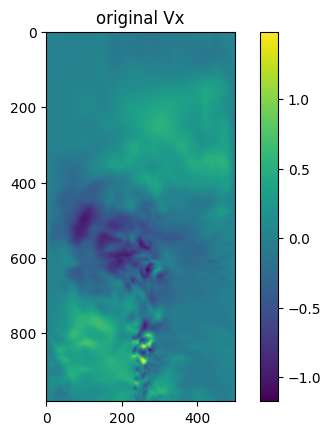

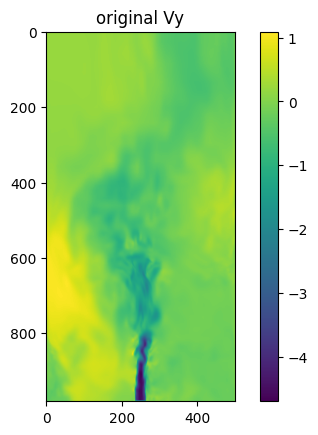

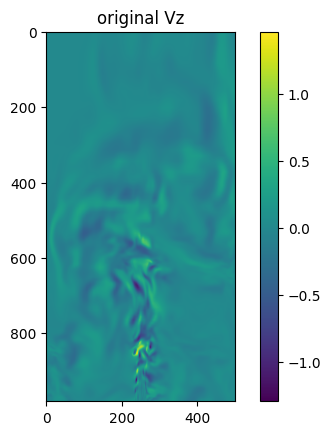

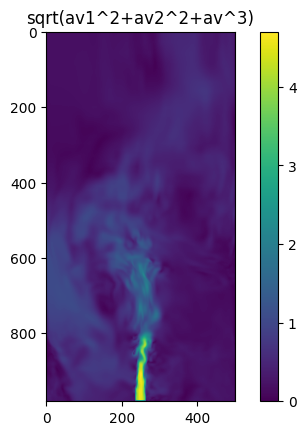

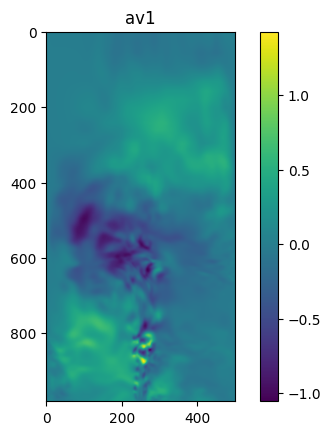

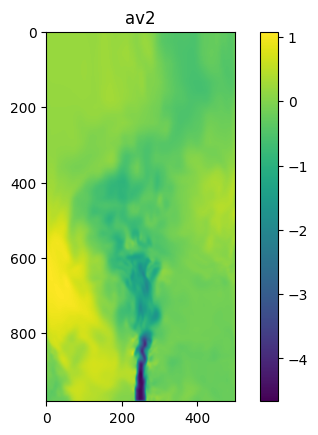

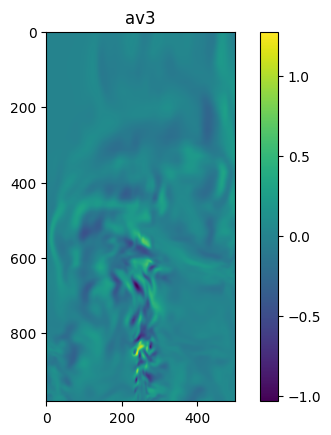

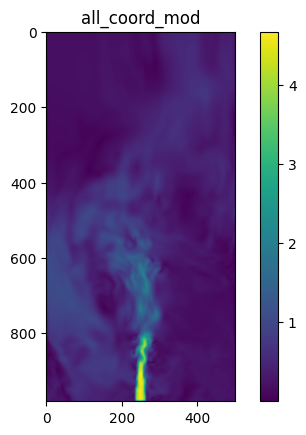

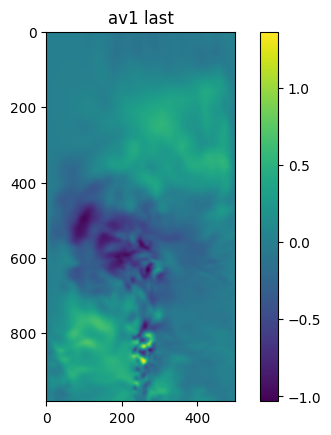

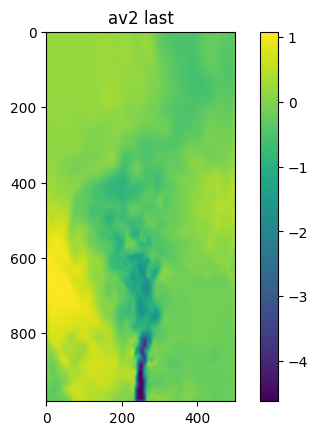

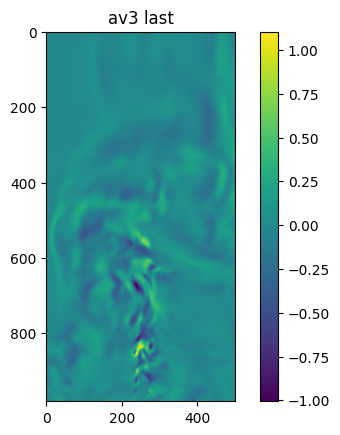

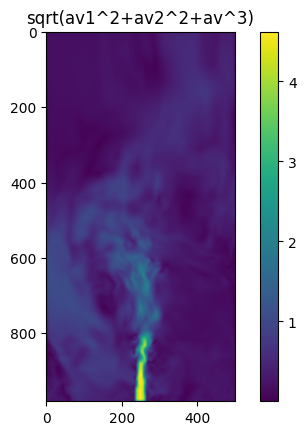

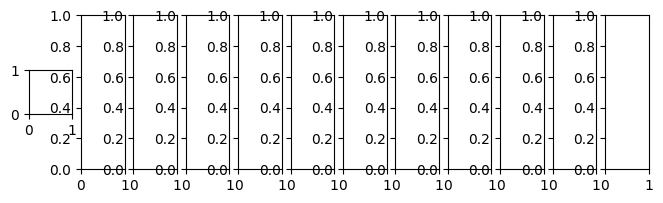

In [21]:
graphics = list()

all_coord_mod = [[float(0) for y in range(len(tmplistX[0]))] for x in range(len(tmplistX))]

for i in range(len(av1)):
    for j in range(len(av1[0])):
        all_coord_mod[i][j] = (tmplistX[i][j]**2 + tmplistY[i][j]**2 + tmplistZ[i][j]**2)**0.5

graphics.append(heatmap(tmplistX, "original Vx"))
graphics.append(heatmap(tmplistY, "original Vy"))
graphics.append(heatmap(tmplistZ, "original Vz"))
graphics.append(heatmap(all_coord_mod, "sqrt(av1^2+av2^2+av^3)"))

# row_of_figures(graphics)

av1 = basic_2d_array_averaging(tmplistX, 2)
av2 = basic_2d_array_averaging(tmplistY, 2)
av3 = basic_2d_array_averaging(tmplistZ, 2)

for i in range(len(av1)):
    for j in range(len(av1[0])):
        all_coord_mod[i][j] = (av1[i][j]**2 + av2[i][j]**2 + av3[i][j]**2)**0.5

graphics.append(heatmap(av1, "av1"))
graphics.append(heatmap(av2, "av2"))
graphics.append(heatmap(av3, "av3"))
graphics.append(heatmap(all_coord_mod, "all_coord_mod"))

# row_of_figures(graphics)

for i in range(1):
    av1 = basic_2d_array_averaging(av1, 2)
    av2 = basic_2d_array_averaging(av2, 2)
    av3 = basic_2d_array_averaging(av3, 2)
    print(str(i) + " / 100")

graphics.append(heatmap(av1, "av1 last"))
graphics.append(heatmap(av2, "av2 last"))
graphics.append(heatmap(av3, "av3 last"))

for i in range(len(av1)):
    for j in range(len(av1[0])):
        all_coord_mod[i][j] = (av1[i][j]**2 + av2[i][j]**2 + av3[i][j]**2)**0.5

graphics.append(heatmap(all_coord_mod, "sqrt(av1^2+av2^2+av^3)"))

row_of_figures(graphics)
